<a href="https://colab.research.google.com/github/aninsung/Machine-Learning-Programming/blob/main/9%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv')
df = df.drop(columns=['Volume'])
df

,Date,Open,High,Low,Close,Adj Close
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000
...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985


In [2]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [3]:
# Apply MinMaxScaler to the relevant columns of the original df
dfx = MinMaxScaler(df[['Open','High','Low']])
dfy = MinMaxScaler(df[['Close']])

X = dfx
y = dfy

In [4]:
dfx.describe()

,Open,High,Low
count,2956.000000,2956.000000,2956.000000
mean,0.110027,0.111635,0.109085
std,0.203093,0.206314,0.200802
min,0.000000,0.000000,0.000000
25%,0.013320,0.013769,0.013288
50%,0.035274,0.035609,0.035275
75%,0.052656,0.053244,0.052649
max,1.000000,1.000000,1.000000


In [5]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [6]:
window_size = 60

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.898536495302811, 0.899618122204982, 0.8858488472125421], [0.8897238464016016, 0.8875229475992507, 0.874086094372499], [0.8594195875945165, 0.880709372082259, 0.8650334133277128], [0.8692556513646092, 0.8697833581775113, 0.866219523093316], [0.9296123305085839, 0.9657948106551784, 0.9333116191599605], [0.9635634830126538, 0.9713828248656547, 0.9226114979091821], [0.9287188996677059, 0.9410158457398028, 0.8879822553395225], [0.8721472294589909, 0.8746214280198039, 0.8381389187483618], [0.87488443233124, 0.8689206125982644, 0.8294898533423705], [0.8096057060551937, 0.8513180389271487, 0.8047782378966809], [0.8531979958332304, 0.864824317236882, 0.8532294340996216], [0.8736498309823736, 0.8962636996985968, 0.8810464923607296], [0.8981953239825952, 0.8968765299420701, 0.8431142227831939], [0.8257527943405847, 0.8455930089660486, 0.8322740328011873], [0.8312190696870404, 0.8607442624696153, 0.8344815980149586], [0.8434836866013361, 0.8477459855250475, 0.8171340456195256], [0.817508664131

In [7]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (2027, 60, 3) (2027, 1)
테스트 데이터의 크기 : (869, 60, 3) (869, 1)


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

In [9]:
RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window_size,3)), # Corrected input_shape
    tf.keras.layers.SimpleRNN(32), # Removed return_sequences=True
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
RNN.compile(optimizer='adam', loss='mean_squared_error')
RNN.fit(train_X, train_y, epochs=70)
pred_y = RNN.predict(test_X)

Epoch 1/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0055
Epoch 2/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.4251e-05
Epoch 3/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7328e-05
Epoch 4/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7294e-05
Epoch 5/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.7878e-05
Epoch 6/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7904e-05
Epoch 7/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.1172e-05
Epoch 8/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 1.6867e-05
Epoch 9/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.2175e-05
Epoch 10/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.2799e-05
Epoch 11/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.3806e-05
Epoch 12/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.0992e-05
Epoch 13/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.6042e-05
Epoch 14/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.3423e-06
Epoch 15/70
64/64 ━

In [11]:
RNN.evaluate(test_X, test_y)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0059


0.025723746046423912

In [12]:
y_pred = RNN.predict(test_X)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [13]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.025723745827590242


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


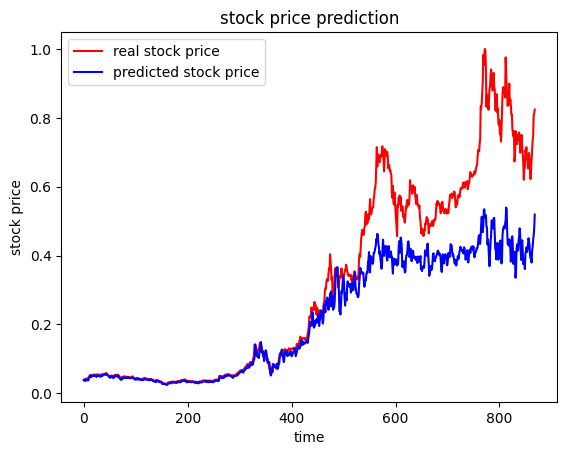

In [14]:
pred_y = RNN.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# LSTM 모델

In [19]:
LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window_size, train_X.shape[2])),
    tf.keras.layers.Dense(1)
])
LSTM .compile(optimizer='adam', loss='mse')
LSTM .fit(train_X, train_y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 9.0487e-05
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 4.2297e-06
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 3.6274e-06
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 3.5386e-06
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 3.9713e-06
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 3.0848e-06
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 2.5824e-06
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 2.3564e-06
Epoch 9/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 2.0590e-06
Epoch 10/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.4130e-06
Epoch 11/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 2.6781e-06
Epoch 12/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 1.9692e-06
Epoch 13/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1.9270e-06
Epoch 14/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.9551e-

In [23]:
LSTM.evaluate(test_X, test_y)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9003e-04


0.001114045619033277

In [24]:
y_pred = LSTM.predict(test_X)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [25]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.0011140455453529257


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


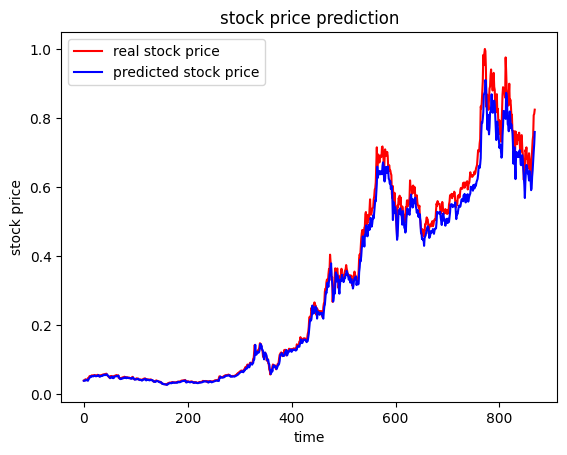

In [28]:
pred_y = LSTM.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()